# Basic Calculus

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Differentiation

The basic idea of [differentiation](https://en.wikipedia.org/wiki/Differential_calculus) is that we take the difference of a function over very small distances. That's seriously all it is.

$$\begin{align}
\frac{df}{dx} &= \lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x) - f(x)}{\Delta x}
\end{align}$$

Numerically, we just approximate it like,

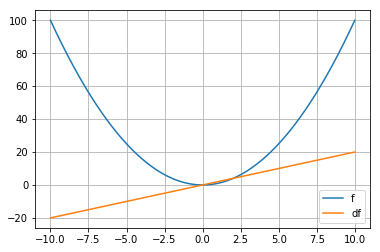

In [3]:
def f(x):
    return x**2

def df(x, dx=1e-3):
    return (f(x + dx) - f(x))/dx

x = np.arange(-10, 10, 1e-3)

plt.plot(x, f(x))
plt.plot(x, df(x))
plt.legend(['f', 'df'])
plt.grid()
plt.show()

**Problem:** For the above plot, we notice that $ f'(x) = \frac{df}{dx} $ is a straight line. Compute the [slope](https://en.wikipedia.org/wiki/Slope) and intercept of that line numerically.

Numpy has a useful function [`np.polyval`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyval.html) that computes the value of any polynomial. For example, we can plot polynomials like,

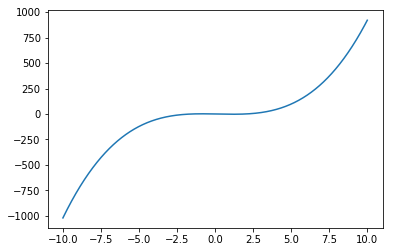

In [4]:
x = np.arange(-10, 10, 1e-3)
f = np.polyval([1.0, -0.5, -3.0, 0.25], x)
plt.plot(x, f)
plt.show()

where the list `[1.0, -0.5, -3.0, 0.25]` are the polynomial coefficients.

**Problem:** Write a function that given an arbitrary set of polynomial coefficients, it computes the derivative of the polynomial numerically. Be sure to compute the differences between each pair of points and don't assume a constant $ \Delta x $.

In [5]:
def polydiff(coeffs, x):
    # Replace the next line with your own code
    return np.gradient(np.polyval(coeffs, x))/np.gradient(x)

You can verify by comparing it to our simple example above

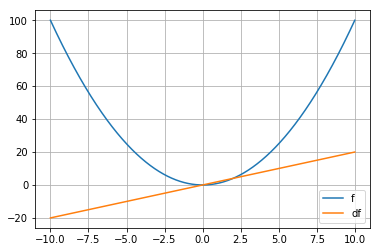

In [6]:
coeffs = [1.0, 0.0, 0.0]
x = np.arange(-10, 10, 1e-3)
plt.plot(x, np.polyval(coeffs, x))
plt.plot(x, polydiff(coeffs, x))
plt.legend(['f', 'df'])
plt.grid()
plt.show()

Numpy also has [`np.polyval`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) which fits a polynomial to your data. We can see this give us back out coefficients.

In [7]:
coeffs = [1, 3, 5]
x = np.arange(-10, 10, 1e-3)
f = np.polyval(coeffs, x)
print(np.polyfit(x, f, deg=len(coeffs)-1))

[ 1.  3.  5.]


**Problem:** Using the polydiff I wrote below (just because it will run faster), write a function that computes the coefficients of the polynomial for the derivative.

In [8]:
def polydiff(coeffs, x):
    return np.gradient(np.polyval(coeffs, x))/np.gradient(x)

def diff_coeffs(coeffs):
    """
    Return the coefficients for the derivative polynomial
    """
    pass

Now if we consider polynomials like,

$$\begin{align}
P_\vec{a}(x) = \sum_n a_n x^n
\end{align}$$

If we take the derivative of this polynomial, we could imagine getting another polynomial like,
$$\begin{align}
\frac{d}{dx} P_\vec{a}(x) = \sum_n b_n x^n
\end{align}$$

Where there ought to be some kind of relation between $ \vec{a} $ and $ \vec{b} $. Lets hypothesis that this relationship is a matrix transformation.

$$\begin{align}
\vec{b} = D \vec{a}
\end{align}$$

**Problem:** Generate a large set of samples by giving `diff_coeffs` random coefficients (just go up to length 5). Collect the input and output coefficients into two matrices `A` and `B` of shape `(M, 5)` and `(M, 5)` respectively.

In [9]:
samples = 100
order = 5
A, B = np.empty((samples, order)), np.empty((samples, order))

With these two matrices, we can now get the matrix that transforms $ A \rightarrow B $ via,

In [12]:
D, _, _, _ = np.linalg.lstsq(A, B)
D

array([[  0.00000000e+00,   9.02638204e-69,   0.00000000e+00,
          9.02638204e-69,   0.00000000e+00],
       [  0.00000000e+00,   4.80415187e-73,   0.00000000e+00,
          4.80415187e-73,   0.00000000e+00],
       [  0.00000000e+00,  -6.23411795e-73,   0.00000000e+00,
         -6.23411795e-73,   0.00000000e+00],
       [  0.00000000e+00,   2.59980729e-73,   0.00000000e+00,
          2.59980729e-73,   0.00000000e+00],
       [  0.00000000e+00,  -4.51321224e-69,   0.00000000e+00,
         -4.51321224e-69,   0.00000000e+00]])

**Problem:** What do you notice about the output? What does this say about differentiation of polynomials.

# Integration

The basic idead behind [integration](https://en.wikipedia.org/wiki/Integral) is to sum up the function like,

$$\begin{align}
F(b) - F(a) = \int^b_a dx~f(x) \approx \lim_{N \rightarrow \infty}\sum_{n=0}^{N} \Delta x~f(a + n \Delta x )
\end{align}$$
where $ \Delta x = \frac{b - a}{N} $.

We can compute this numerically like,

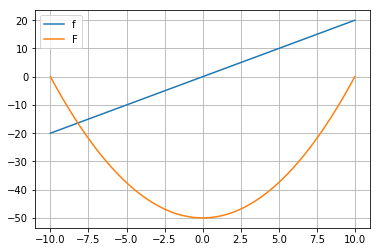

In [3]:
def f(x):
    return 2*x

def F(x):
    return np.gradient(x) * np.cumsum(x)

x = np.arange(-10, 10, 1e-3)
plt.plot(x, f(x))
plt.plot(x, F(x))
plt.legend(['f', 'F'])
plt.grid()
plt.show()

It's interesting that $ F(x) $ is some kind of parabola. This is not an accident. Turns out this stems from the [Fundamental Theorem of Calculus](https://en.wikipedia.org/wiki/Fundamental_theorem_of_calculus) and in fact isn't too hard to prove.

**Problem:** We will use hacky math for simplicity. For,

$$\begin{align}
f'(x) &= \frac{f(x+\Delta x) - f(x)}{\Delta x}
\end{align}$$

Show that,
$$\begin{align}
\int_a^b dx~f'(x) &= \sum_n \Delta x~f'(x + n \Delta x) = f(b) - f(a)
\end{align}$$

To do this, just substitute the derivative definition in and cancel out all the terms.

*Integration is very difficult in practice, and I by no means care to teach how to integrate in general. I'll teach these as they become important in the future.*